In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [22]:
pokemon = pd.read_csv('DataSet/pokemon.csv'); pokemon.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [13]:
pokemon.isnull()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
799,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [21]:
pokemon.isna().sum().sort_values(ascending=False)[0:4]

type2              384
percentage_male     98
weight_kg           20
height_m            20
dtype: int64

In [23]:
pokemon.columns()

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [42]:
pokemon.loc[1]

abilities            ['Overgrow', 'Chlorophyll']
against_bug                                  1.0
against_dark                                 1.0
against_dragon                               1.0
against_electric                             0.5
against_fairy                                0.5
against_fight                                0.5
against_fire                                 2.0
against_flying                               2.0
against_ghost                                1.0
against_grass                               0.25
against_ground                               1.0
against_ice                                  2.0
against_normal                               1.0
against_poison                               1.0
against_psychic                              2.0
against_rock                                 1.0
against_steel                                1.0
against_water                                0.5
attack                                        62
base_egg_steps      

In [36]:
pokemon.loc[:,['name']].iloc[0:3]

,name
0,Bulbasaur
1,Ivysaur
2,Venusaur


<AxesSubplot:xlabel='type1', ylabel='Count'>

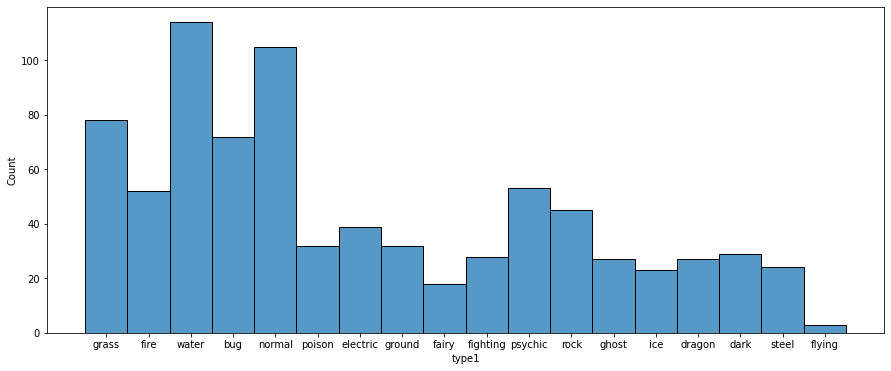

In [23]:
plt.figure(figsize=(15,6))
test = sb.histplot(data=pokemon,x='type1')
test

<AxesSubplot:xlabel='height_m', ylabel='weight_kg'>

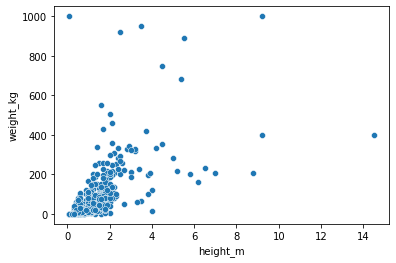

In [50]:
sb.scatterplot(data=pokemon,x='height_m',y='weight_kg')

In [ ]:
sb.scatterplot(data=pokemon,x='height_m',y='weight_kg')

In [7]:
test = pokemon[(pokemon['height_m']>1)]

<AxesSubplot:xlabel='weight_kg', ylabel='height_m'>

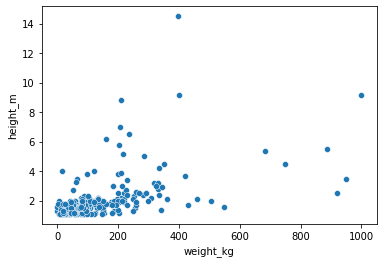

In [9]:
sb.scatterplot(data=test,y='height_m',x='weight_kg')


# Question 2

In [42]:
sales = pd.read_csv('DataSet/sales_predictions.csv')

In [43]:
sales['date'] = pd.to_datetime(sales['date'])

In [54]:
sales[(sales['item_id']==1)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1552550,2014-04-04,15,55,1,4490.0,1.0
1552605,2014-02-04,15,55,1,4490.0,1.0
1815470,2014-06-07,18,55,1,4490.0,1.0
1906681,2014-04-08,19,55,1,4490.0,1.0
2021246,2014-11-09,20,55,1,4490.0,1.0
2069410,2014-10-20,21,55,1,4490.0,1.0


In [48]:
sample = sales.sample(50)

In [49]:
sample

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2339292,2015-01-25,24,7,2833,198.00,1.0
757097,2013-08-28,7,53,5275,1699.00,1.0
2567021,2015-04-24,27,25,6002,399.00,1.0
1232726,2013-12-21,11,35,14512,199.00,1.0
692693,2013-07-25,6,54,14828,199.00,4.0
1720153,2014-06-16,17,31,1856,2499.00,2.0
2757730,2015-07-19,30,25,17581,399.00,1.0
1972513,2014-09-25,20,53,19080,99.00,1.0
580646,2013-06-13,5,6,17906,399.00,1.0
2567689,2015-04-19,27,25,3329,1199.00,1.0


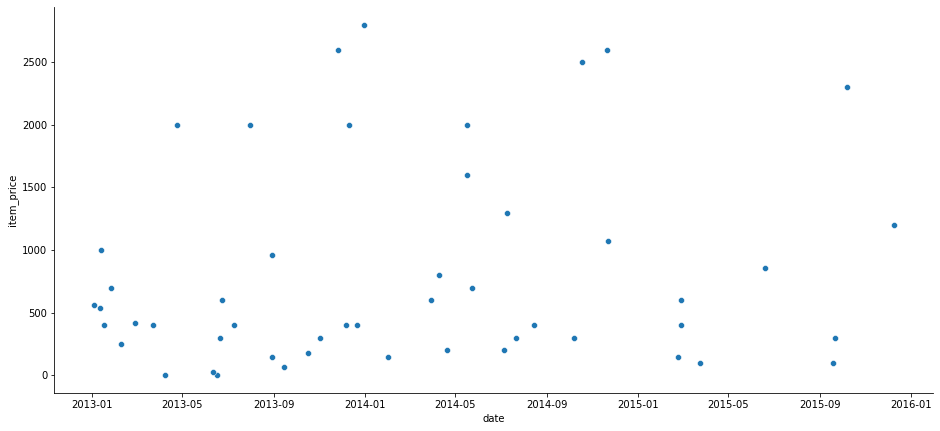

In [39]:
f = sb.relplot(data=sample,y='item_price',x='date')
f.fig.set_figwidth(15)
f.fig.set_figheight(6)

Question 3

In [118]:
data = pd.read_csv('DataSet/ibm_hr_attrition.csv')

In [57]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [59]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


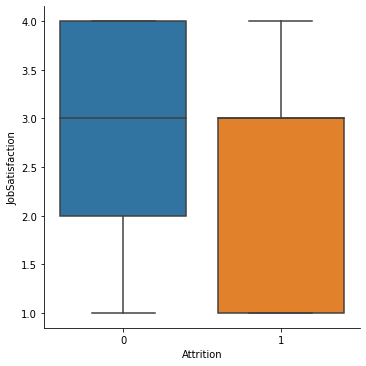

In [102]:
sb.catplot(data=data,y='JobSatisfaction',x='Attrition', kind='box')

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

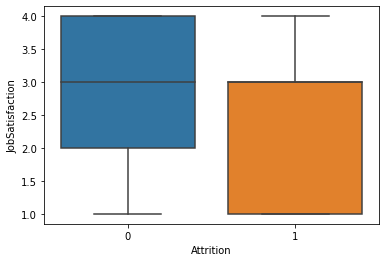

In [104]:
sb.boxplot(data=data,y='JobSatisfaction',x='Attrition')

In [73]:
dataclean = data[(data['JobSatisfaction']>0) & (data['JobSatisfaction']<5)]

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

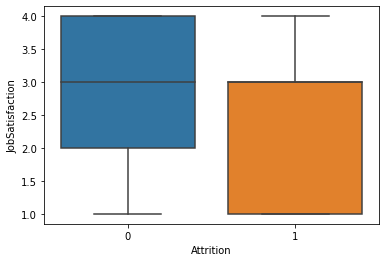

In [106]:
sb.boxplot(data=data,y='JobSatisfaction',x='Attrition')

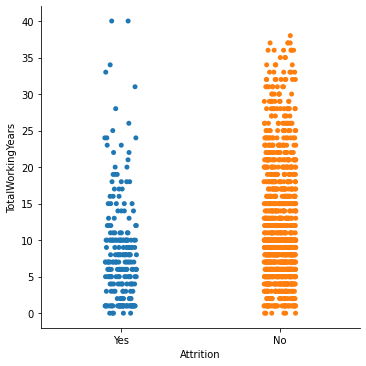

In [114]:
sb.catplot(data=data,y='TotalWorkingYears',x='Attrition')

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

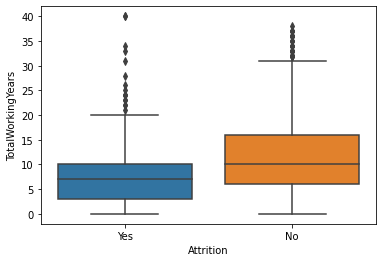

In [115]:
sb.boxplot(data=data,y='TotalWorkingYears',x='Attrition')

In [117]:
data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [119]:
data['Attrition'] = data['Attrition'].replace({'Yes': 1, 'No': 0})

In [122]:
plt.figure(figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='EducationField', ylabel='Probability'>

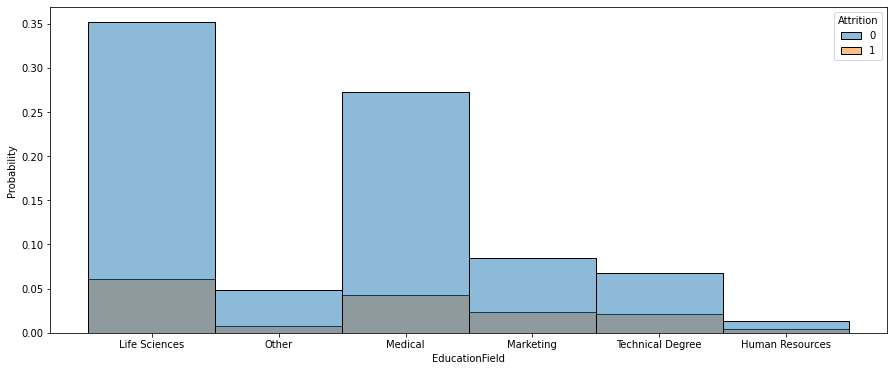

In [130]:
plt.figure(figsize=(15,6))
sb.histplot(data=data,x='EducationField',hue='Attrition', stat='probability')